# Module 2 Practice: Linear Models, SVM, and KNN

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.exceptions import ConvergenceWarning
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings(action="ignore", category=ConvergenceWarning)


DATASET = "../datasets/titanic.csv"
assert os.path.exists(DATASET)

## Data Loading and Preparation

In order to practice using KNN, Linear Models, or SVMs, we'll need to have a train and test dataset. Let's use the titanic dataset that was imported above. In the cell below, load the data into a DataFrame and separate the features into `X` and `y`

In [2]:
# -------
# Your code here

df = pd.read_csv(DATASET)
X = df.drop(columns=["survived"]).values
y = df.survived.values

## Building a Train and Test Function

In order to best evaluation our models, let's build a function that will take in the features and labels to use for evaluation, splits the data into train test based on a passed-in variable, and evaluates a model that was also passed in. Be sure to set the random state so that each train/test split is identical between runs. Return the accuracy of the model on the test partition from the function

In [3]:
# ----
# Your code here


def titanic_model_eval(model, X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, preds)
    return acc

## Training Linear Models

Let's test a Logistic Regression model. Create a linear regression model with an $L_1$ penalty, a `liblinear` solver, and a regularization constant of 1.5. Allow a maximum number of iterations to 100.

In [4]:
# ----
# Your code here

model = LogisticRegression(penalty="l1", solver="liblinear", C=1.5, max_iter=100)

Now, use the function we built above to get the test accuracy on the titanic dataset with an 80/20 train/test split

In [5]:
# ----
# Your code here
titanic_model_eval(model, X, y, 0.2)

0.7415730337078652

We can also use our function to see how our performance changes as we adjust the train/test split:

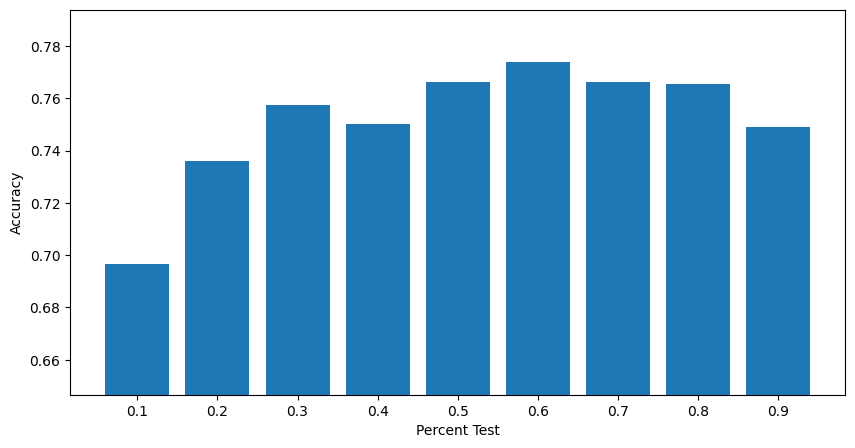

In [6]:
pct_test = np.linspace(0, 1, 11)[1:-1]
scores = [titanic_model_eval(model, X, y, P) for P in pct_test]

plt.bar(pct_test, scores, width=0.08)
plt.xticks(pct_test)
plt.ylim(min(scores) - 0.05, max(scores) + 0.02)
plt.xlabel("Percent Test")
plt.ylabel("Accuracy")
plt.gcf().set_size_inches(10, 5)

## MLP and Max Iter

Train and test a Perceptron model with $L_2$ penalty, an alpha of 0.005, and a max iteration of 50. Use a train/test split of 70/30.

In [7]:
# ----
# Your code here
perceptron = Perceptron(penalty="l2", alpha=0.005, max_iter=50)
titanic_model_eval(perceptron, X, y, 0.3)

0.602996254681648

We've seen a Perceptron classifier, but there is another Gradient Descent based classifer that stacks multiple Perceptrons together into layers, known ans a [Multi-Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), or MLP. 

Let's train an MLP on the data and see how it performs:

In [8]:
titanic_model_eval(MLPClassifier(solver="sgd", max_iter=50), X, y, 0.3)

0.6142322097378277

So, it performs better than the Perceptron! Interesting! Let's try varying the maximum number of iterations and seeing how that affects the performance. Try at least 5 different max iteration values and plot them in a bar plot, like we did for the Logistic Regression. Be sure to use an SGD solver, and set the random state of the classifer.

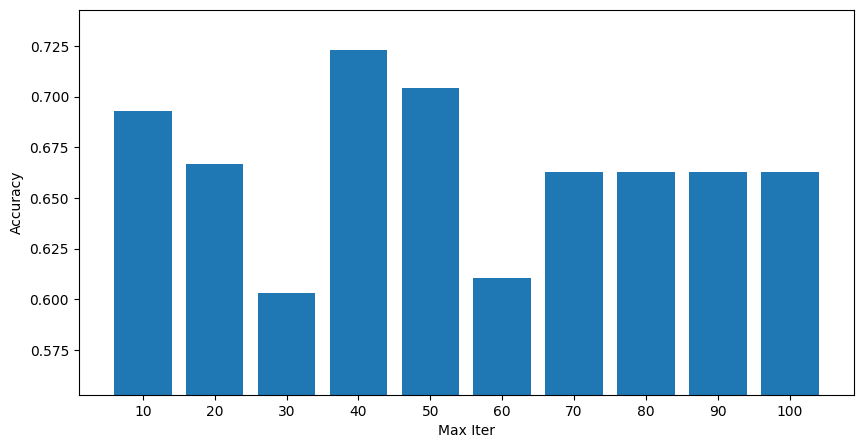

In [9]:
# -----
# Your code here
max_iter = np.linspace(10, 100, 10, dtype=int)
scores = [
    titanic_model_eval(
        MLPClassifier(solver="sgd", max_iter=M, random_state=29), X, y, 0.3
    )
    for M in max_iter
]

plt.bar(max_iter, scores, width=8)
plt.xticks(max_iter)
plt.ylim(min(scores) - 0.05, max(scores) + 0.02)
plt.xlabel("Max Iter")
plt.ylabel("Accuracy")
plt.gcf().set_size_inches(10, 5)

What you should have seen is that the MLP Classifier is very sensitive to the maximum number of iterations used in training

## SVMs

Finally, let's build a couple of SVM models on the Titanic Data. 

In the cell below, train an SVM Classifier with default parameters on the titanic data, using a train test split of 80/20

In [10]:
# -----
# Your code here
titanic_model_eval(SVC(), X, y, 0.2)

0.651685393258427

SVMs are most sensitive to their kernel and their regularization. Train at least 2 more SVM models, varying these parameters are you see fit:

In [11]:
# -----
# Your code here
titanic_model_eval(SVC(kernel="rbf", C=2.0), X, y, 0.2)

0.6573033707865169

In [12]:
# -----
# Your code here
titanic_model_eval(SVC(kernel="poly", C=100), X, y, 0.2)

0.6741573033707865

## Comparing Models

A common practice in Machine Learning is comparing the performance of models. 

In the cell below, split the data into train and test with a 90/10 split. Then create one of each of the models we used above: Logistic Regression, Perceptron, MLP, and SVM. 

Train and test each one on your train/test split data. Use the same max iteration for all of them, but you are free to select other parameters as you see fit. Then, rank the models by their accuracy.

Do not use the `titanic_model_eval` function.

In [13]:
# -----
# Your code here

models = [
    LogisticRegression(max_iter=200),
    Perceptron(max_iter=200),
    MLPClassifier(max_iter=200),
    SVC(max_iter=200),
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

output = {}
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, preds)
    output[type(model).__name__] = acc

pd.DataFrame(output.items(), columns=["Model", "Accuracy"]).sort_values(
    "Accuracy", ascending=False
).reset_index(drop=True)

,Model,Accuracy
0,LogisticRegression,0.797753
1,MLPClassifier,0.741573
2,Perceptron,0.719101
3,SVC,0.280899
